In [1]:
import spatialdata as sd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq
import anndata as ad

import pickle

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline


/nfs/team361/aa36/PythonEnvs_2/envinflowdec27/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(


In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig5"
sc.settings.set_figure_params(dpi_save=600, facecolor="white", frameon=False, figsize=(8,8))


In [3]:
NICHE="niche19"

In [4]:
# import sys
# !{sys.executable} -m pip install spatialdata_io

# Latest

In [5]:
# # FILE_NAME = "adata_xenium_freeze.h5ad"  #"adata_xenium_v3.h5ad.final.timepointsforpaper"
# # PATH=f'/nfs/team298/ls34/adult_skin/final_adatas/{FILE_NAME}'

# # adata_5k=sc.read_h5ad(PATH)
# # # adata_5k.obs["Timepoint2"].value_counts()
# #adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_v1.h5ad.final')
# adata_5k=sc.read_h5ad('/nfs/team298/ls34/adult_skin/final_adatas/adata_xenium_freeze_plus3d.h5ad.v2')

# def remove_markers(LIST):
#     try: 
#         LIST = {key: [gene for gene in genes if gene in adata_5k.var_names] 
#                            for key, genes in LIST.items()}
#     except: 
#         LIST =[gene for gene in LIST if gene in adata_5k.var_names]
#     return LIST



# adata_5k.obs["lvl5_annotation_new"]=adata_5k.obs["scanvi_predictions"]

# adata_5k

PATH = '/nfs/team298/ls34/adult_skin/final_adatas/adata_combined_new.h5ad.final.filtered'
adata_5k=sc.read_h5ad(PATH)
adata_5k=adata_5k[adata_5k.obs["tech"]=="xenium"].copy()
import gc
gc.collect()


7515

In [6]:
# colors_new2 = {
#    # 'Epidermis_mid': '#839edd',  # blue
#     'Superficial dermis1': '#FFFF00',  # yellow
#        # 'Superficial dermis2': 
#     'Superficial dermis':"#FFFF00", # "#f6d17a", # yellow
#     'Papillary_dermis':"#FFFF00", # "#f6d17a", # yellow
    
#     'Superficial dermis / inflammatory memory': "#f6d17a", #"#f6d178", #'#FFA500',  # orange
#     'Perivascular_T-rich': "#dcb0f2", #NICE PRUPLE, # lighter prupkle = "#E5D4F6", # #'#a3dbe5',  # brown
#     'Interstial stroma1': "#aec8e8", # "#FF6600", #pink#"#ffbdc8",# '#FFD700',  # dark yellow
#   #  'Perivascular':  "#845DAE", #  '#fedbe7' PINKSIH,  #'#f8daeb',  # darkish red
#     'Small blood vessel': "#d73435", #'#fe78bb',  # bright red
#     'Interstial stroma2':  "#6A8ED8", #blueish-quitegood"#6A76C8",# "#ff68b3",#'#B8860B',  # very dark yellow
#     'Sweat_gland': '#008080',  # dark grey
#         'Sweat_gland_channel': "#adf7e8", #'#008080',  # original - 40E0D0

#     'Muscle': "#f371af",  # very dark red
#     'Adipocyte+vessels': "#B8860B", #'#FF4500',  # very dark orange
#      'Hypodermis': "#FFFFF0", #"#D2B48C",#' # yello  # white = '#ffffff',

#     'Epidermis mid inflammatory': '#f4e9ef',  # pink
#         'Epidermis_mid1': '#f4e9ef',  # pink

#     'Larger blood vessel': "#660000",#"#8B0000", #'#FF6347',  # coral red
#     'Perineural': '#0A0A0A',  # almost black
#     'KC_HF1_outer':  "#94cb72", #'#008000',  # green
#     'Sebocyte_immunecell': "#ff6145",#'#654321',  # dark brown
#     'Sebocyte': '#e28743',  # brown
#    # 'Plasma+pDC': '#808080',  # bright turquoise
#     'Epidermis basal/mid': '#4682B4',  # darkish blue
#     #'Sweat gland channel': '#000000',  # black
#     #'KC_immunecell': '#FF1493',  # dark pink
#     'Perifollicular_VE': '#006400',  # dark green
#     'KC_HF2_basal': '#7CFC00',  # bright green
#     'KC_HF4_medulla': '#00FF00',  # very bright green
#     'KC_HF3_inner': "#abe8bd", #'#228B22',  # darkish green
#     'KC_immune': '#FFB6C1',  # light pink
#      'KCinflamm_late': '#c8cada',  # very dark blue
#     'Artery_endothelium': '#fe78bd',  # bright red
    
#    # 'Epidermis_late': '#b1dae6',
#  'Superficial dermis regenerative': '#ffa500',
#  'Nonspecific?perivascular': '#D3D3D3',
#     "Nonspecific":"#D3D3D3",
#  'Interstitial stroma': '#d0e1f2',
#      'Reticular_dermis': '#d0e1f2',

#     "Interstitial stroma2": "#535a60", #'#d0e1f2',
#  'Large_BV': '#660000',
#  'Small_BV': "#c43f40",#'#D96B6B',
#  'Perineural?': '#0A0A0A',
#  'Perineural?/HF?': '#2a2a2a',
#  'Superficial perivascular': "#845DAE",# '#F4D1A1',
#      'Tzone-like': "#845DAE",# '#F4D1A1',

#  'BV outer': '#f371af',
#  'Sebaceous_gland': "#FFD9A3",      #  "#FFB347",#"#94cb72",#'#e28743',
#      'Sebaceous_gland_immune': "#ff6145", #'#ff6145',
# "Sebaceous_immune": "#ff6145", 
#  'Plasma_cell_niche': "#FFB300",#"#40E0D0",#'#ff5e00',
#  'KC_HF1': '#94cb72',
#      'KC_HF': '#94cb72',
#      'HF': '#94cb72',

# # 'KC_HF2': 
#     'HF_Perineural': '#00FF00',
#     'PeriHF': "#006600",# '#00FF00',
#     "OuterHF": "#006600",# 
#  'Sebaceous duct': '#e28743',
#  'KC_HairShaft': '#abe8bd',
#  'Epidermis_Inflammatory': '#f2e7ed',
#  'Epidermis_Inflamm_immune': "#ff1493", # '#f4e9ef',
#         "Epidermis_APChi": "#ff1493",

#  'Epidermis_basal_immune': "#B039D4", # '#e4dbdf',
#     'Epidermis_mid_inflamm': "#f4e9ef", # '#f4e9ef',
#         'Epidermis_late':"#2a2f5c",#"#2a2f5c" ,# "#2e2e2e",#'#b1dae6',  # light blue

# 'Epidermis_mid1':  '#FADADD', 
#     'Epidermis_mid':  '#4682B4', 
# 'Epidermis_mid2':  "#E6F0FF",#"#fbfafb", #"#F2F9FC",#'#4682B4', 
# "Lymphoid Tzone-like": "#825bac",
#         'Epidermis_basal': "#007cfe",#'#4f59a1',  # dark blue
#     "Epidermis basal": "#007cfe",
#      'Epidermis_basal1': "#f0f8ff",#'#505aa1',
#  'Epidermis basal2': '#505aa1',

#         'Epidermis basal_cycling': "#007cfe",  #  e2d8dd   "#505aa1",#"#c590a5" , # '#e0c5d2',

#      #007FFF
#         'Interstial stroma2':  "#6A8ED8", #blueish-quitegood"#6A76C8",# "#ff68b3",#'#B8860B',  # very dark yellow
# "Interstitial_stroma2_LErich" : "#6A8ED8",
#     "Reticular_dermis_LErich" : "#6A8ED8",

#     # nice blue =  "#007cfe",  # 
# }

# # NEW_LI=[]
# # for x in adata.obs["niche12"].unique():
# #     if x not in colors_new2.keys():
# #         print(x)
# #         NEW_LI.append(x)
# # {x:"" for x in NEW_LI}

# # # timepoints = [ 'Lesional Baseline',  ]

# # # Identify unique donors
# # donors = ["BK21", #"BK23"
# #          ]
# # sc.settings.set_figure_params(dpi=100, facecolor="white", frameon=False, figsize=(18,18))

# # # Generate a spatial plot for each donor and timepoint combination
# # for row, donor in enumerate(donors):
# #     for col, timepoint in enumerate(timepoints):
# #         donor_timepoint_data = adata_5k[
# #             (adata_5k.obs["Sanger patient ID"] == donor) & (adata_5k.obs["Timepoint"] == timepoint)
# #         ]
        
   
# #         sq.pl.spatial_scatter(
# #             donor_timepoint_data,
# #             library_id="spatial",
# #             shape=None,
# #             color="niche_name",
# #             size=10,
# #             vmax=1,
# #             #ax=ax,
# #             legend_loc="on data"  # Disable the legend for each subplot
# #         ) 
# #         sq.pl.spatial_scatter(
# #             donor_timepoint_data,
# #             library_id="spatial",
# #             shape=None,
# #             color="niche_name",
# #             size=5,
# #             vmax=1,
# #             #ax=ax,
# #             #legend_loc=None # Disable the legend for each subplot
# #         ) 

# import pickle

# with open('/nfs/team298/ls34/niche_colors.pkl', 'wb') as f:
#     pickle.dump(colors_new2, f)
# with open('/nfs/team298/ls34/color_for_adult_skin_XENIUMniches.pkl', 'wb') as f:
#     pickle.dump(colors_new2, f)




# # NEW_LI=[]
# # for x in adata_5k.obs["niche12"].unique():
# #     if x not in colors_new2.keys():
# #         print(x)
# #         NEW_LI.append(x)
# # {x:"" for x in NEW_LI}



# # try:
# #     del(adata_5k.uns['niche12_colors'])
# # except:
# #     1
# # adata_5k=adata_5k.copy()
# # adata_5k.obs['niche12'] =adata_5k.obs['niche12'] .astype('category')
# # adata_5k.uns['niche12_colors'] = [colors_new2.get(cat, '#D3D3D3')  # Default to light grey if not found
# #                                      for cat in adata_5k.obs['niche12'].cat.categories]

In [7]:
[x for x in adata_5k.obs["info_id6"].unique() if "CE3" in x ]

['Baseline_resolved_CE3-SKI-28-FO-1-S22-B1',
 'Lesional_CE3-SKI-24-FO-1-S22-A1',
 'Week 8 (resolved)_CE3-SKI-28-FO-4-S22-E1_a',
 'Week 8 (resolved)_CE3-SKI-28-FO-4-S22-E1_b',
 'Baseline_never_CE3-SKI-28-FO-2-S22-C1',
 'Baseline_resolved_CE3-SKI-28-FO-1-S22_replicate',
 'Week 8 (resolved)_CE3-SKI-28-FO-4-S22_replicate',
 'Lesional_CE3-SKI-24-FO-1-S22_replicate',
 'Baseline_never_CE3-SKI-28-FO-2-S22_replicate']

In [8]:
import pickle

with open('/nfs/team298/ls34/niche_colors.pkl', 'rb') as f:
    colors_loaded = pickle.load(f)

 

/tmp/ipykernel_89882/2844414206.py:4: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(


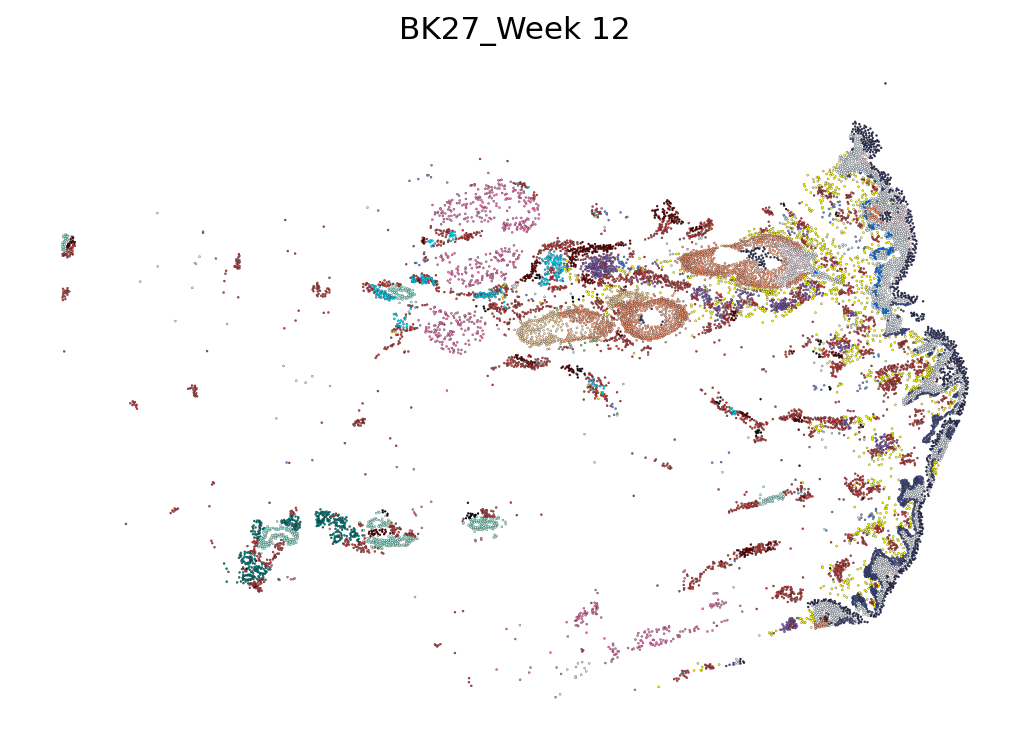

In [13]:
for x in [ 'BK27_Week 12'        ]:
    adata_i=adata_5k[adata_5k.obs["info_id6"]==x]

    sc.pl.spatial(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
       # library_id="spatial",
      #  shape=None,
        color=[NICHE],
        spot_size=10,
        vmax=1,
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        title=x,
        legend_loc=None,
        save=f"fig5a_niches_{x}_v2.pdf",
       
    )
     


  

In [ ]:
STOP

In [ ]:
for x in [ 'BK39_Lesional Baseline',  'BK22_Lesional Baseline',
          'Lesional_CE3-SKI-24-FO-1-S22-A1',
        #  'Lesional_Baseline_resolved_CE3-SKI-24-FO-1-S22_replicate',
          # 'Lesional_CE3-SKI-24-FO-1-S22_replicate',
           'Lesional_CE4-SKI-27-FO-4-S22-A2',
      #'Lesional_CE4-SKI-27-FO-4-S22_replicate',

         ]:
    adata_i=adata_5k[adata_5k.obs["info_id6"]==x]

    # adata_i.obs[NICHE] =adata_i.obs[NICHE] .astype('category')
    # adata_i.uns[NICHE+'_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
    #                                      for cat in adata_i.obs[NICHE].cat.categories]
    # # adata_i.obs['niche17_alt2'] =adata_i.obs['niche17_alt2'] .astype('category')
    # adata_i.uns['niche17_alt2_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
#     #                                      for cat in adata_i.obs['niche17_alt2'].cat.categories]
#     sc.pl.spatial(
#         adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#        # library_id="spatial",
#       #  shape=None,
#         color=[NICHE],
#         spot_size=10,
#         vmax=1,
#                 edgecolor="black",
#         linewidth=0.2,
#                 legend_fontsize=12,
#         title=x,
#         legend_loc=None,
#         save=f"fig5a_niches_{x}.pdf",
       
        
#     )
    sc.pl.spatial(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
       # library_id="spatial",
      #  shape=None,
        color=[NICHE],
        spot_size=8,
        vmax=1,
             edgecolor="black",
       linewidth=0.04,
                legend_fontsize=12,
        title=x,
        legend_loc=None,
        save=f"fig5a_niches_{x}_v1.pdf",
       
    )
     


 
#     )
 


In [ ]:
for x in [ 'BK39_Lesional Baseline',  'BK22_Lesional Baseline',
          'Lesional_CE3-SKI-24-FO-1-S22-A1',
        #  'Lesional_Baseline_resolved_CE3-SKI-24-FO-1-S22_replicate',
          # 'Lesional_CE3-SKI-24-FO-1-S22_replicate',
           'Lesional_CE4-SKI-27-FO-4-S22-A2',
      #'Lesional_CE4-SKI-27-FO-4-S22_replicate',

         ]:
    adata_i=adata_5k[adata_5k.obs["info_id6"]==x]

    # adata_i.obs[NICHE] =adata_i.obs[NICHE] .astype('category')
    # adata_i.uns[NICHE+'_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
    #                                      for cat in adata_i.obs[NICHE].cat.categories]
    # # adata_i.obs['niche17_alt2'] =adata_i.obs['niche17_alt2'] .astype('category')
    # adata_i.uns['niche17_alt2_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
#     #                                      for cat in adata_i.obs['niche17_alt2'].cat.categories]
#     sc.pl.spatial(
#         adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#        # library_id="spatial",
#       #  shape=None,
#         color=[NICHE],
#         spot_size=10,
#         vmax=1,
#                 edgecolor="black",
#         linewidth=0.2,
#                 legend_fontsize=12,
#         title=x,
#         legend_loc=None,
#         save=f"fig5a_niches_{x}.pdf",
       
        
#     )
    sc.pl.spatial(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
       # library_id="spatial",
      #  shape=None,
        color=[NICHE],
        spot_size=10,
        vmax=1,
                edgecolor="black",
        linewidth=0.1,
                legend_fontsize=12,
        title=x,
        legend_loc=None,
        save=f"fig5a_niches_{x}_v2.pdf",
       
    )
     


 
#     )
 


In [ ]:
for x in [ 'BK39_Lesional Baseline',  'BK22_Lesional Baseline',
          'Lesional_CE3-SKI-24-FO-1-S22-A1',
        #  'Lesional_Baseline_resolved_CE3-SKI-24-FO-1-S22_replicate',
          # 'Lesional_CE3-SKI-24-FO-1-S22_replicate',
           'Lesional_CE4-SKI-27-FO-4-S22-A2',
      #'Lesional_CE4-SKI-27-FO-4-S22_replicate',

         ]:
    adata_i=adata_5k[adata_5k.obs["info_id6"]==x]

    # adata_i.obs[NICHE] =adata_i.obs[NICHE] .astype('category')
    # adata_i.uns[NICHE+'_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
    #                                      for cat in adata_i.obs[NICHE].cat.categories]
    # # adata_i.obs['niche17_alt2'] =adata_i.obs['niche17_alt2'] .astype('category')
    # adata_i.uns['niche17_alt2_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
#     #                                      for cat in adata_i.obs['niche17_alt2'].cat.categories]
#     sc.pl.spatial(
#         adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
#        # library_id="spatial",
#       #  shape=None,
#         color=[NICHE],
#         spot_size=10,
#         vmax=1,
#                 edgecolor="black",
#         linewidth=0.2,
#                 legend_fontsize=12,
#         title=x,
#         legend_loc=None,
#         save=f"fig5a_niches_{x}.pdf",
       
        
#     )
    sc.pl.spatial(
        adata_i,#[adata_i.obs["Timepoint"].str.startswith("Les")],
       # library_id="spatial",
      #  shape=None,
        color=[NICHE],
        spot_size=15,
        vmax=1,
                edgecolor="black",
        linewidth=0.01,
                legend_fontsize=12,
        title=x,
        legend_loc=None,
        save=f"fig5a_niches_{x}_v3.pdf",
       
    )
     


 
#     )
 


In [ ]:
stop

In [ ]:
# for x in [ 'BK39_Lesional Baseline',  'BK22_Lesional Baseline',
#           'Lesional_CE3-SKI-24-FO-1-S22-A1',
#         #  'Lesional_Baseline_resolved_CE3-SKI-24-FO-1-S22_replicate',
          
#            'Lesional_CE3-SKI-24-FO-1-S22_replicate',
#            'Lesional_CE4-SKI-27-FO-4-S22-A2',
#       'Lesional_CE4-SKI-27-FO-4-S22_replicate',

#          ]:
#     adata_i=adata_5k[adata_5k.obs["info_id6"]==x]

#     # adata_i.obs['niche17'] =adata_i.obs['niche17'] .astype('category')
#     # adata_i.uns['niche17_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
#     #                                      for cat in adata_i.obs['niche17'].cat.categories]
#     # adata_i.obs['niche17_alt2'] =adata_i.obs['niche17_alt2'] .astype('category')
#     # adata_i.uns['niche17_alt2_colors'] = [colors_loaded.get(cat, '#D3D3D3')   
#     #                                      for cat in adata_i.obs['niche17_alt2'].cat.categories]
#     # sc.pl.spatial(
#     #     adata_i,
#     #     color=["CCL19", "CCL22", "CCL17"],
#     #     spot_size=20,
#     #     vmax=2,
#     #             edgecolor="black",
#     #     linewidth=0.1,
#     #             legend_fontsize=12,
#     #     title=x,
#     #     legend_loc=None,
#     #     cmap="Reds"  )
    
#     sc.pl.spatial(
#         adata_i,
#         color=["CCL19", "CCL22", "CCL17"],
#         spot_size=20,
#         vmax=2,
#                 edgecolor="black",
#         linewidth=0.1,
#                 legend_fontsize=12,
#         title=x,
#         legend_loc=None,
#         cmap="Reds" ,
#             save=f"x_chemokines_{x}.pdf"
#     )
 


In [ ]:
# adata_5k_i = adata_5k[adata_5k.obs["Site_status_binary"]=="Lesional"]
# sc.pl.DotPlot(
#     adata_5k_i,
#     ["CCL19", "CCL22", "CCL17"],
#     #swap_axes=True,
#     groupby="niche17",
#    vmax=1,
#     #    colorbar_title='Mean expression\n(variance scaled)', 
#  standard_scale="var",
#    # save="5g_AD.pdf",
# ) \
#     .style(cmap='Reds', color_on='square', dot_edge_color='white', dot_edge_lw=2, grid=False, #vmax=.8
#                dot_max=.3

#           )\
# .show()




In [ ]:
0